In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### Reading CSV files

In [2]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [3]:
df_2014.shape

(3808, 225)

In [4]:
df_2015.shape

(4120, 225)

In [5]:
df_2016.shape

(4797, 225)

In [6]:
df_2017.shape

(4960, 225)

In [7]:
df_2018.shape

(4392, 225)

In [8]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [9]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [10]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [11]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [12]:
df.shape

(22077, 226)

In [13]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [14]:
df['Unnamed: 0'].head(10)

0      PG
1    VIPS
2      KR
3     RAD
4     GIS
5      PM
6      KO
7     WMT
8    MDLZ
9      MO
Name: Unnamed: 0, dtype: object

In [15]:
df.rename(columns={"Unnamed: 0":"Name"}, inplace=True)

In [16]:
df.Name.nunique()

4980

In [17]:
df.loc[(df.Name=="PG")]

,Name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,2014
0,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,2015
0,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,-0.0528,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,2016
0,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,-0.0195,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,2017
26,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,0.0247,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,2018


In [18]:
df.shape

(22077, 226)

In [19]:
df.info

<bound method DataFrame.info of       Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0       PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1     VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2       KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3      RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4      GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...    ...           ...             ...              ...           ...   
4387  YRIV  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388  YTEN  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389  ZKIN  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390   ZOM  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391  ZYME  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Inc

In [20]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class,Year
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,19952.000000,19650.000000,19690.000000,19213.000000,19462.000000,19598.000000,19655.000000,2.207700e+04,22077.000000,22077.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,10.978239,0.158858,1.134221,0.783208,3.733922,0.295610,0.365149,2.698893e+02,0.550754,2016.090954
std,3.197314e+10,312.648170,2.583092e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,1101.098165,3.268154,45.381079,66.524006,174.864701,12.974127,15.030054,1.934617e+04,0.497429,1.374340
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,-1.003972e+02,0.000000,2014.000000
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,-0.051125,0.000000,-0.031075,-0.103800,-0.067475,0.000000,-0.013700,-1.947409e+01,0.000000,2015.000000
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,3.909087e+00,1.000000,2016.000000
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.200550,0.058400,0.176800,0.142100,0.150075,0.000000,0.185350,2.750567e+01,1.000000,2017.000000
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,2.418601e+06,1.000000,2018.000000


In [21]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [22]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [23]:
df.head(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0


### Understanding Null Value Distribution

In [24]:
df.isnull().sum().sort_values(ascending=False)

cashConversionCycle                           22058
operatingCycle                                22058
shortTermCoverageRatios                       10744
10Y Shareholders Equity Growth (per Share)     9680
10Y Revenue Growth (per Share)                 9532
                                              ...  
Net cash flow / Change in cash                 1018
Financing Cash Flow                             972
Sector                                            0
Next_Year_Price_Var[%]                            0
Class                                             0
Length: 224, dtype: int64

In [25]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

cashConversionCycle                           99.913938
operatingCycle                                99.913938
shortTermCoverageRatios                       48.666033
10Y Shareholders Equity Growth (per Share)    43.846537
10Y Revenue Growth (per Share)                43.176156
                                                ...    
Net cash flow / Change in cash                 4.611134
Financing Cash Flow                            4.402772
Sector                                         0.000000
Next_Year_Price_Var[%]                         0.000000
Class                                          0.000000
Length: 224, dtype: float64

In [26]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                             0.000000
Sector                            0.000000
Next_Year_Price_Var[%]            0.000000
Financing Cash Flow               4.402772
Net cash flow / Change in cash    4.611134
Operating Income                  4.987091
Receivables                       5.005209
Retained earnings (deficit)       5.286044
Operating Cash Flow               5.290574
Revenue                           5.304163
Cash and cash equivalents         5.340400
Earnings Before Tax Margin        5.412873
Gross Margin                      5.430992
Gross Profit                      5.467228
EPS Diluted                       5.852244
dtype: float64

In [27]:
# all cols have some null values
len(df.isnull().any())

224

In [28]:
# No columns with all null values
df.columns[df.isnull().all()]

Index([], dtype='object')

In [29]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

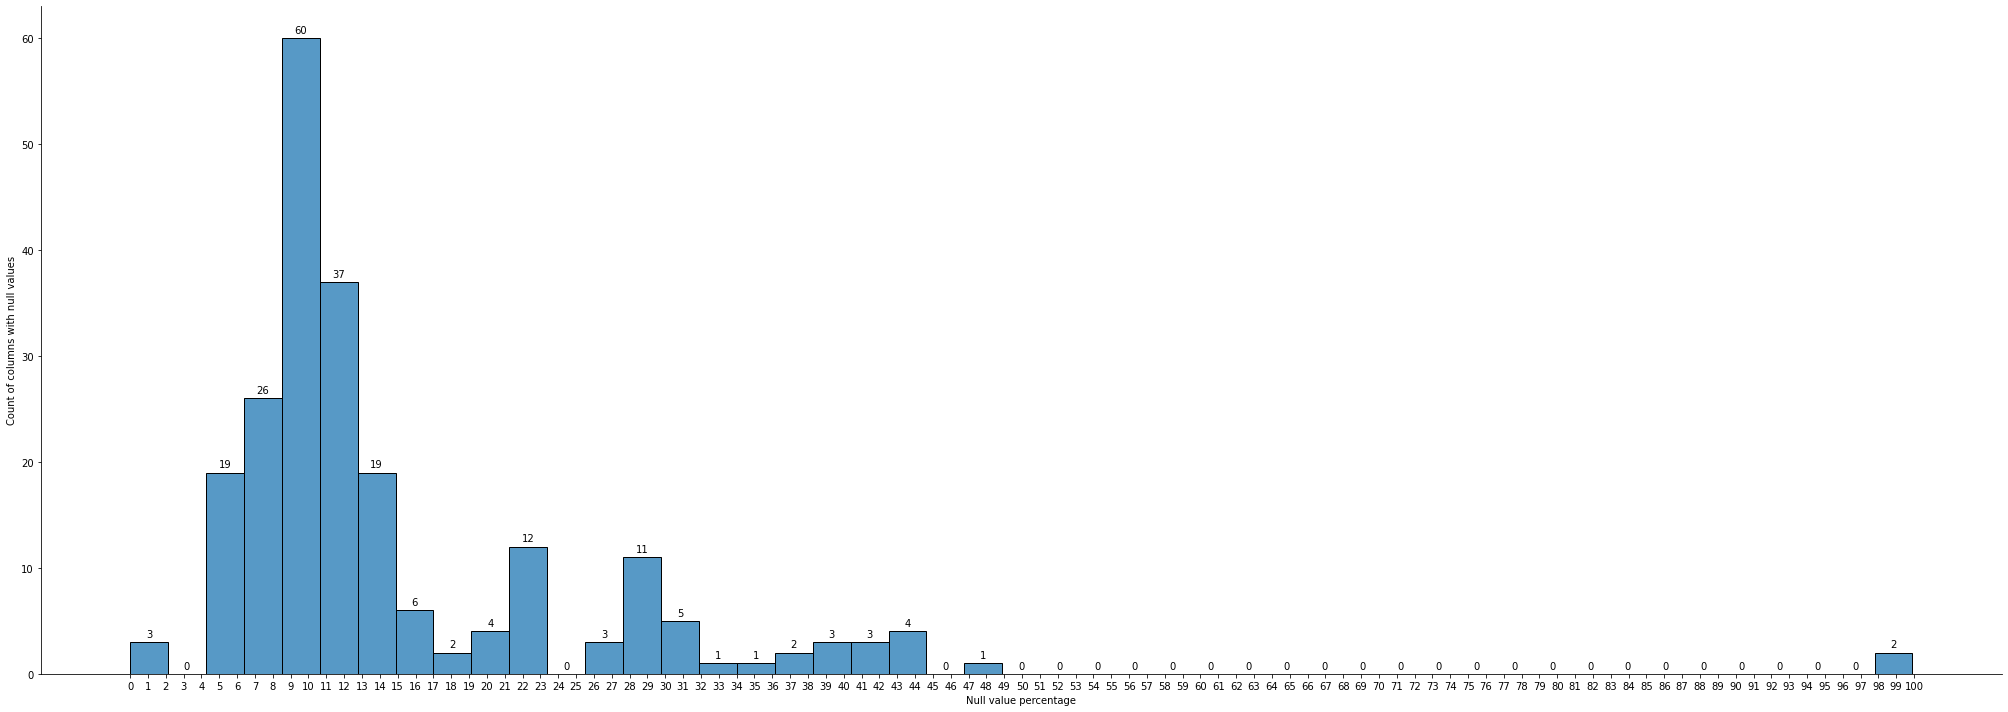

In [30]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

<AxesSubplot:>

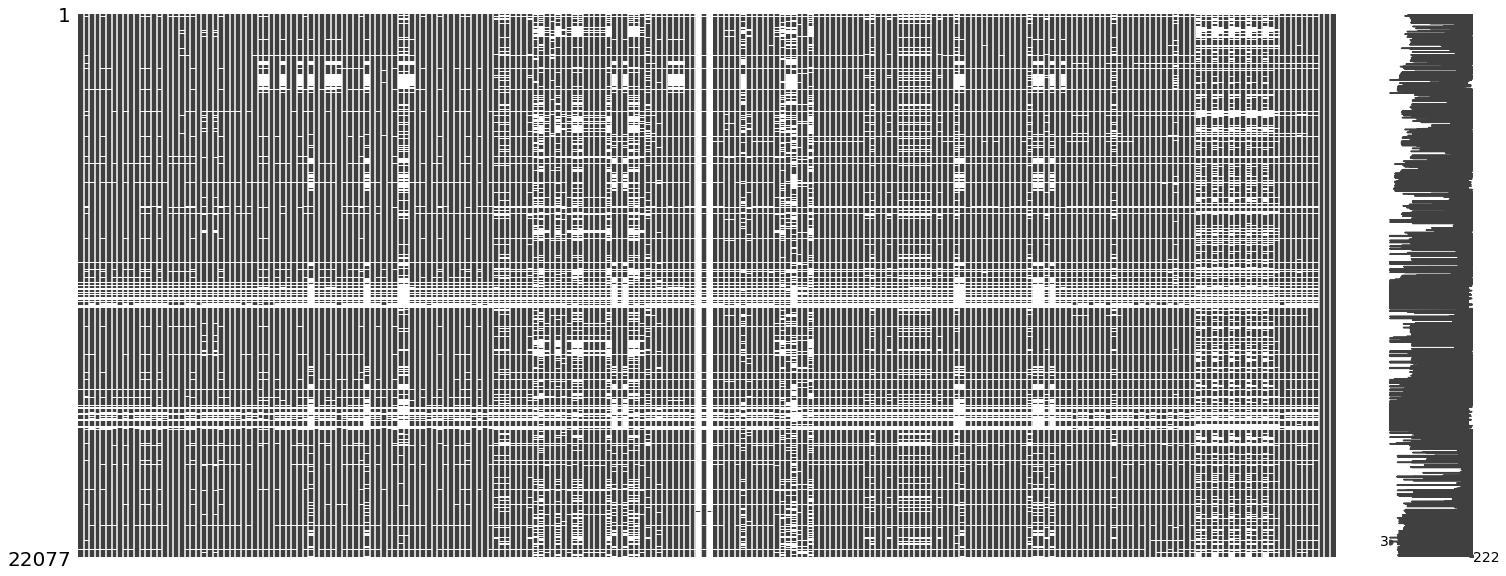

In [31]:
msno.matrix(df)

In [32]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [33]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [34]:
len(greater_than_70)

2

In [35]:
greater_than_70

,Percentage
cashConversionCycle,99.91
operatingCycle,99.91


In [36]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [37]:
len(greater_than_50)

2

In [38]:
greater_than_50

,Percentage
cashConversionCycle,99.91
operatingCycle,99.91


In [39]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

,Percentage
cashConversionCycle,99.91
operatingCycle,99.91
shortTermCoverageRatios,48.67
10Y Shareholders Equity Growth (per Share),43.85
10Y Revenue Growth (per Share),43.18
10Y Net Income Growth (per Share),43.18
10Y Operating CF Growth (per Share),42.93
10Y Dividend per Share Growth (per Share),41.57
priceEarningsToGrowthRatio,41.12
dividendPayoutRatio,41.12


### Removing Null Values

In [40]:
# function to drop cols which have more than 15% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [41]:
df.shape

(22077, 224)

In [42]:
remove_cols_with_nulls(df, 20)

In [43]:
df.shape

(22077, 172)

In [44]:
len(df.columns[(df.isnull().any())])

169

In [45]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [46]:
# Therefore, there is no row will all NULL values
df.shape

(22077, 172)

In [47]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [48]:
df.shape

(12804, 172)

<AxesSubplot:>

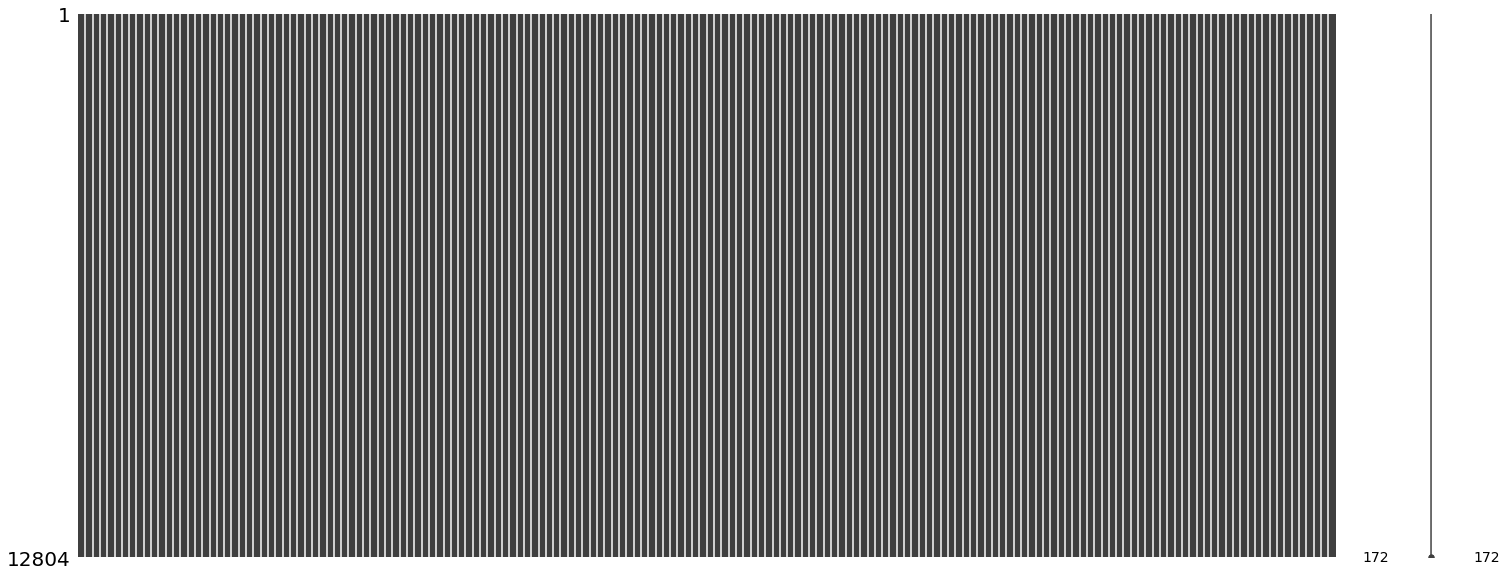

In [49]:
msno.matrix(df)

In [50]:
df.isnull().any().sum()

0

In [51]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', 'Next_Year_Price_Var[%]', 'Class'],
      dtype='object', length=172)

In [52]:
df.select_dtypes('number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,0.0,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,...,0.0908,-0.0835,-0.0540,0.0219,-0.0763,0.1258,0.0000,-0.0053,5.339413,1
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,0.0,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,...,-0.1547,-0.1907,-0.1619,-0.0113,-0.0567,0.0349,0.0000,-0.1036,-38.548749,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,0.0,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,...,0.3154,0.1295,0.0352,0.0815,-0.0658,0.3515,0.0000,0.0579,18.603845,1
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,122000000.0,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,...,0.0291,0.0551,0.0984,-0.0252,0.3269,-0.0984,-0.0469,-0.0733,22.628763,1
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,0.0,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,...,0.1619,0.1052,0.0894,0.1098,0.0912,0.0000,0.0000,0.0376,58.666783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,6.966000e+06,0.1192,0.000000e+00,6.966000e+06,0.0,2.804000e+06,3.673000e+06,3.293000e+06,0.000000e+00,3.253000e+06,...,0.2599,0.0000,0.0000,0.0019,0.0559,-0.0029,0.0000,-0.0018,11.671183,1
4382,2.307974e+07,0.1068,8.298240e+06,1.478150e+07,0.0,1.059878e+07,1.059878e+07,4.182715e+06,4.576890e+05,3.939586e+06,...,0.0000,0.3368,0.0983,0.0299,0.0674,-0.0666,0.0000,0.1463,-3.076927,0
4385,3.546600e+07,0.1186,2.702000e+06,3.276400e+07,0.0,2.446700e+07,2.883400e+07,3.930000e+06,1.011000e+06,2.919000e+06,...,0.0000,0.2910,0.0000,0.0225,0.0348,-0.2154,0.0000,0.0276,27.118650,1
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4759000.0,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,-77.922077,0


In [53]:
df['R&D Expenses'].value_counts()

0.0            7956
6469000.0         3
105000000.0       3
106000000.0       3
73100000.0        3
               ... 
32220000.0        1
23138050.0        1
19147000.0        1
3659000.0         1
5570029.0         1
Name: R&D Expenses, Length: 4709, dtype: int64

In [54]:
df.shape[0]

12804

In [55]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.6213683223992502

In [56]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [57]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

12804

In [58]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [59]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  19


In [60]:
df.shape

(12804, 153)

In [61]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       'Free Cash Flow growth', 'Receivables growth', 'Inventory Growth',
       'Asset Growth', 'Book Value per Share Growth', 'Debt Growth',
       'SG&A Expenses Growth', 'Sector', 'Next_Year_Price_Var[%]', 'Class'],
      dtype='object', length=153)

In [62]:
df.select_dtypes(include='number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0.0069,0.0406,-0.0835,-0.0540,0.0219,-0.0763,0.1258,-0.0053,5.339413,1
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,-0.9987,-0.9983,-0.1907,-0.1619,-0.0113,-0.0567,0.0349,-0.1036,-38.548749,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0.0478,0.0111,0.1295,0.0352,0.0815,-0.0658,0.3515,0.0579,18.603845,1
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,-0.1178,-0.1657,0.0551,0.0984,-0.0252,0.3269,-0.0984,-0.0733,22.628763,1
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0.1710,0.1050,0.1052,0.0894,0.1098,0.0912,0.0000,0.0376,58.666783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,6.966000e+06,0.1192,0.000000e+00,6.966000e+06,2.804000e+06,3.673000e+06,3.293000e+06,0.000000e+00,3.253000e+06,1.128000e+06,...,0.5780,0.5774,0.0000,0.0000,0.0019,0.0559,-0.0029,-0.0018,11.671183,1
4382,2.307974e+07,0.1068,8.298240e+06,1.478150e+07,1.059878e+07,1.059878e+07,4.182715e+06,4.576890e+05,3.939586e+06,1.081006e+06,...,-0.0868,-1.1225,0.3368,0.0983,0.0299,0.0674,-0.0666,0.1463,-3.076927,0
4385,3.546600e+07,0.1186,2.702000e+06,3.276400e+07,2.446700e+07,2.883400e+07,3.930000e+06,1.011000e+06,2.919000e+06,1.831000e+06,...,0.4097,0.1450,0.2910,0.0000,0.0225,0.0348,-0.2154,0.0276,27.118650,1
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,0.000000e+00,...,-0.0673,-0.0716,0.3445,0.0000,-0.2323,-0.8602,0.0000,-0.0993,-77.922077,0


In [63]:
df.select_dtypes(include='object')

,Sector
6,Consumer Defensive
12,Consumer Defensive
14,Consumer Defensive
16,Consumer Defensive
18,Consumer Defensive
...,...
4381,Financial Services
4382,Consumer Defensive
4385,Consumer Cyclical
4388,Basic Materials


In [64]:
df.select_dtypes(include='number').shape

(12804, 152)

In [65]:
df.select_dtypes(include='object').shape

(12804, 1)

In [66]:
df.select_dtypes(include='category').shape

(12804, 0)

In [67]:
df.shape

(12804, 153)

In [68]:
# 155 cols ----> 154 number, 1 Object

In [69]:
df.Sector.value_counts()

Technology                2392
Industrials               2001
Healthcare                1878
Financial Services        1622
Consumer Cyclical         1609
Energy                     752
Basic Materials            732
Consumer Defensive         618
Real Estate                599
Utilities                  374
Communication Services     227
Name: Sector, dtype: int64

In [70]:
sector_list = list(df.Sector.unique())

In [71]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [72]:
pd.get_dummies(df.Sector, drop_first=True)

,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
6,0,0,1,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0
16,0,0,1,0,0,0,0,0,0,0
18,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4381,0,0,0,0,1,0,0,0,0,0
4382,0,0,1,0,0,0,0,0,0,0
4385,0,1,0,0,0,0,0,0,0,0
4388,0,0,0,0,0,0,0,0,0,0


In [73]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [74]:
df.shape

(12804, 163)

In [75]:
df.Energy.value_counts()

0    12052
1      752
Name: Energy, dtype: int64

In [76]:
# Droppig Sector Column
df.drop("Sector", axis=1, inplace=True)

In [77]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0,0,1,0,0,0,0,0,0,0
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,0,0,1,0,0,0,0,0,0,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0,0,1,0,0,0,0,0,0,0
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,0,0,1,0,0,0,0,0,0,0
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0,0,1,0,0,0,0,0,0,0


# Removing columns with single value

In [78]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [79]:
for col in df.columns:
    removeSingleValue(col)

In [80]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [81]:
len(num_col)

162

In [82]:
df.shape

(12804, 162)

# Outlier Treatment

In [84]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
6,4.599800e+10,-0.0183,1.788900e+10,2.810900e+10,1.721800e+10,1.840100e+10,9.708000e+09,4.830000e+08,9.299000e+09,2.201000e+09,...,0,0,1,0,0,0,0,0,0,0
12,1.089253e+10,-0.0745,7.697109e+09,3.195419e+09,1.734360e+09,1.898873e+09,1.296545e+09,9.656403e+08,9.679309e+08,1.324071e+08,...,0,0,1,0,0,0,0,0,0,0
14,5.727000e+09,0.0214,3.523600e+09,2.203400e+09,1.480500e+09,1.598700e+09,6.047000e+08,6.040000e+07,4.669000e+08,8.910000e+07,...,0,0,1,0,0,0,0,0,0,0
16,8.268000e+09,0.0268,5.297000e+09,2.971000e+09,1.505000e+09,1.704000e+09,1.267000e+09,1.220000e+08,1.240000e+09,3.740000e+08,...,0,0,1,0,0,0,0,0,0,0
18,9.316256e+09,0.0645,7.751273e+09,1.564983e+09,6.509480e+08,6.509480e+08,9.140350e+08,1.270400e+07,9.188030e+08,3.161260e+08,...,0,0,1,0,0,0,0,0,0,0


In [85]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [86]:
df = remove_outlier_IQR(df)

In [87]:
df.shape

(12804, 162)

In [88]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [89]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
6,NaN,-0.0183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12,NaN,-0.0745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14,5.727000e+09,0.0214,NaN,2.203400e+09,NaN,1.598700e+09,604700000.0,60400000.0,466900000.0,89100000.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16,NaN,0.0268,NaN,NaN,NaN,NaN,NaN,122000000.0,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,NaN,0.0645,NaN,1.564983e+09,650948000.0,6.509480e+08,NaN,12704000.0,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
